In [25]:
# load dataset

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target


In [26]:
print(X.shape)
print(y.shape)


(1797, 64)
(1797,)


In [28]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [29]:
max(set(X.flatten()))

16.0

In [30]:
# normalize the data by the max value. 
X = X / 16.0

# autoencoder's labels are the input
y = X

In [86]:
# training time!

import numpy as np
from nn.nn import NeuralNetwork

from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# transpose to match nn (feature, batch) code
X_train, X_val, y_train, y_val = X_train.T, X_val.T, y_train.T, y_val.T


nn_arch = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}
]


autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.1, seed=42, batch_size=32, epochs=10000, loss_function='mean_squared_error')

train_loss, val_loss = autoencoder.fit(X_train, y_train, X_val, y_val)



Epoch 1  	Training Loss: 0.0028699046985849134	Validation Loss: 0.002724279731345607
Epoch 2  	Training Loss: 0.0027391765991805145	Validation Loss: 0.0026067917704214985
Epoch 3  	Training Loss: 0.0026204369684596114	Validation Loss: 0.002481072955551589
Epoch 4  	Training Loss: 0.0024937146615297222	Validation Loss: 0.0023353631408482463
Epoch 5  	Training Loss: 0.0023470215614059546	Validation Loss: 0.002164021509183964
Epoch 6  	Training Loss: 0.002174588742433443	Validation Loss: 0.001970427237276765
Epoch 7  	Training Loss: 0.00197975252902755	Validation Loss: 0.0017711587176862688
Epoch 8  	Training Loss: 0.0017793051062177058	Validation Loss: 0.0015916001695347516
Epoch 9  	Training Loss: 0.0015988564354710078	Validation Loss: 0.0014512327187743306
Epoch 10  	Training Loss: 0.0014579317316908034	Validation Loss: 0.0013529166936641318
Epoch 11  	Training Loss: 0.0013593344160138866	Validation Loss: 0.0012876965241440876
Epoch 12  	Training Loss: 0.0012939766105598811	Validation 

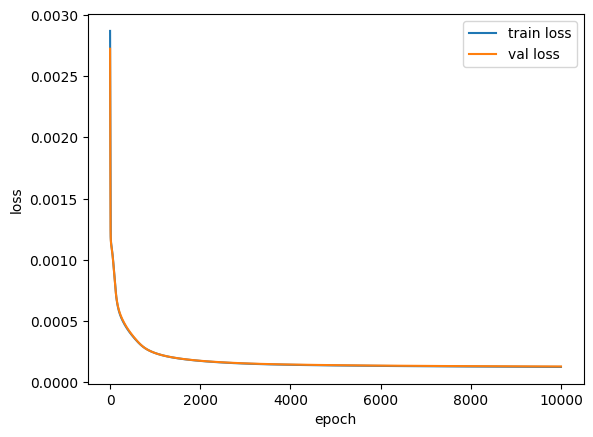

In [87]:
from matplotlib import pyplot as plt

plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [90]:
y_val_pred = autoencoder.predict(X_val)

# MSE as reconstruction metric (lower is better)
reconstruction_error = np.mean(np.square(y_val - y_val_pred))
print(f'Average reconstruction MSE error: {reconstruction_error}')

Average reconstruction MSE error: 0.008171437359293873


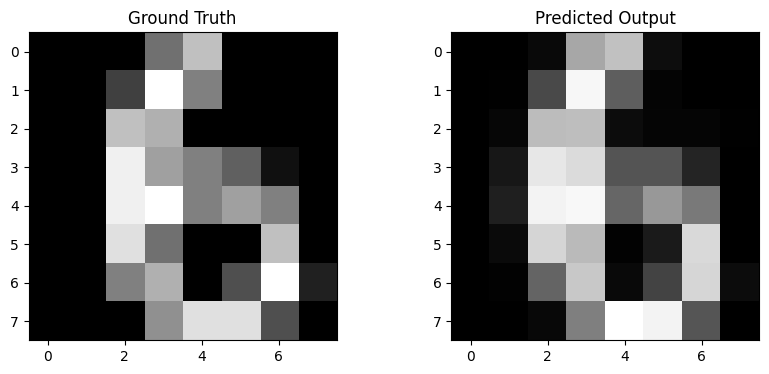

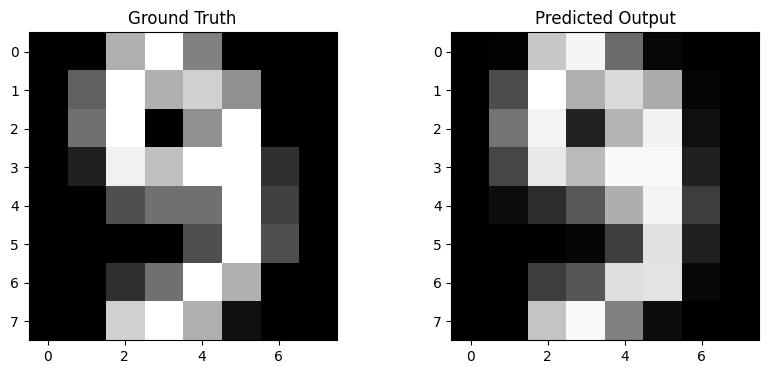

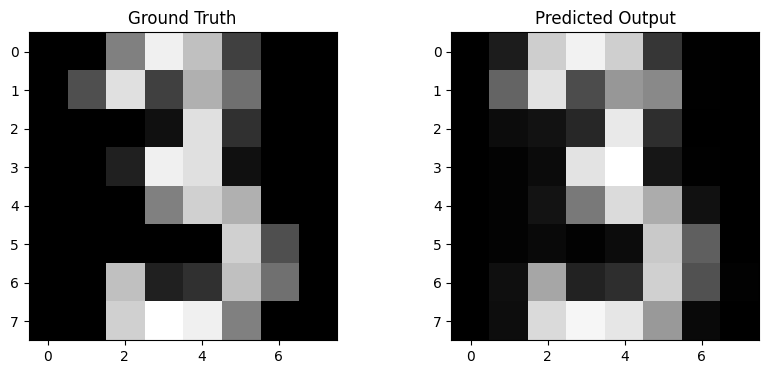

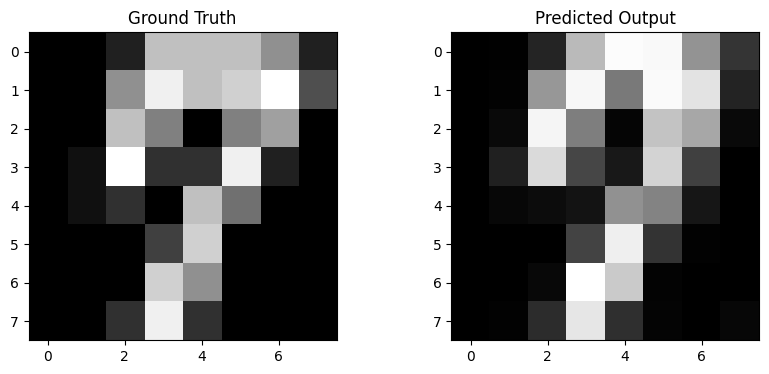

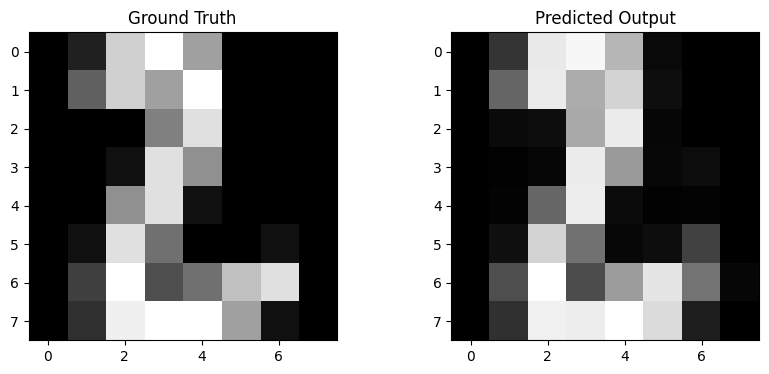

In [93]:
for i in range(5):
    example_truth = (X_val.T)[i].reshape(8, 8)
    example_pred =  (y_val_pred.T)[i].reshape(8, 8)
    # plotting the images side by side
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(example_truth, cmap='gray')
    plt.title('Ground Truth')

    plt.subplot(1, 2, 2)
    plt.imshow(example_pred, cmap='gray')
    plt.title('Predicted Output')

In [95]:
'''
*Explain why you chose the hyperparameter values you did.*



Learning rate: I played around with a bunch of values, and found that 0.1 did well

Epochs: I found the larger the value, the better the model performed. I'm sure maybe
a touch higher could be better, but I didn't want to wait for longer epochs.

Relu is more aggressive activation, so I used it in the inner layer. Last layer had to
be sigmoid since relu could be too "binary" to yeild a good image.

MSE loss since this isn't a binary task

32 mini batches was chosen without any real reason. I think this is near lower
boundbefore things get too bumpy in the loss
'''

'\nExplain why you chose the hyperparameter values you did.\n\n\n\nLearning rate: I played around with a bunch of values, and found that 0.1 did well\n\nEpochs: I found the larger the value, the better the model performed. I\'m sure maybe\na touch higher could be better, but I didn\'t want to wait for longer epochs.\n\nRelu is more aggressive activation, so I used it in the inner layer. Last layer had to\nbe sigmoid since relu could be too "binary" to yeild a good image.\n\nMSE loss since this isn\'t a binary task\n\n32 mini batches was chosen without any real reason. I think this is near lower\nboundbefore things get too bumpy in the loss\n'